<a href="https://colab.research.google.com/github/aved991/customer_segmentation---Unsupervised-Machine-Learning/blob/main/CustomerSegmentation_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation using K-Means Project**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Loading Data set**

In [31]:
df=pd.read_csv('https://raw.githubusercontent.com/aved991/customer_segmentation---Unsupervised-Machine-Learning/refs/heads/main/data%20set/Mall_Customers(K-Means%20algo).csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
df.rename(columns={'Annual Income (k$)':'Annual_Income(k$)'}, inplace=True)
df

,CustomerID,Gender,Age,Annual_Income(k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
df.shape

(200, 5)

# **Descriptive Analysis**

In [34]:
df.describe()

,CustomerID,Age,Annual_Income(k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual_Income(k$),int64
Spending Score (1-100),int64


In [36]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income(k$),0
Spending Score (1-100),0


# **Filtering Data set**

In [37]:
df.drop(['CustomerID'], axis=1,inplace=True)

In [38]:
df.head()

,Gender,Age,Annual_Income(k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# **Data Visualization**

## **Age Distribution of Customers**

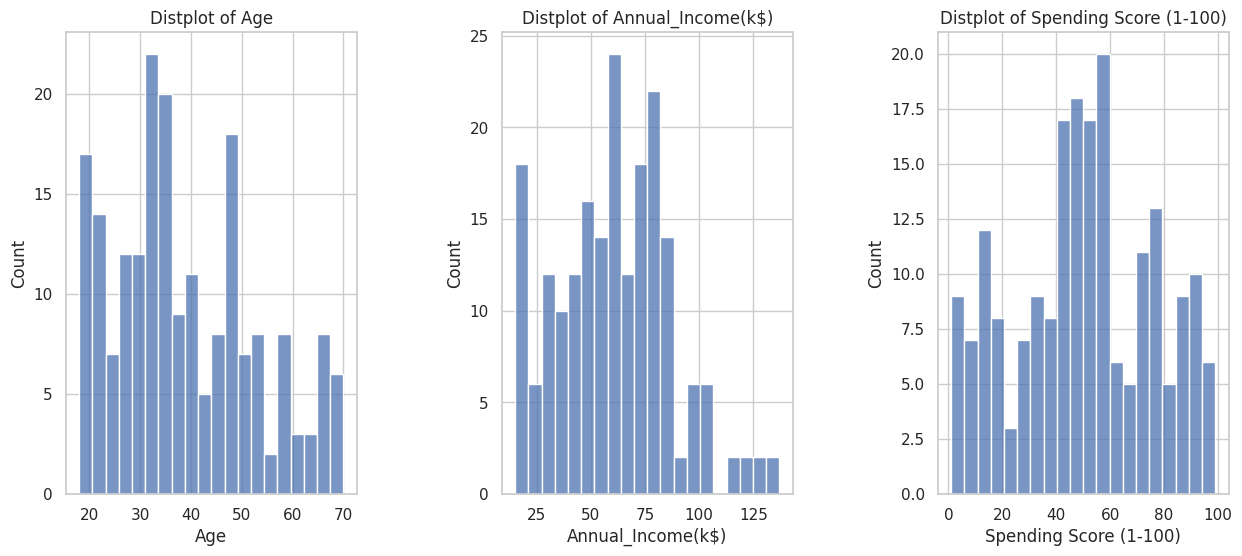

In [39]:

plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Annual_Income(k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)

    sns.histplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

##  **Gender Distribution**

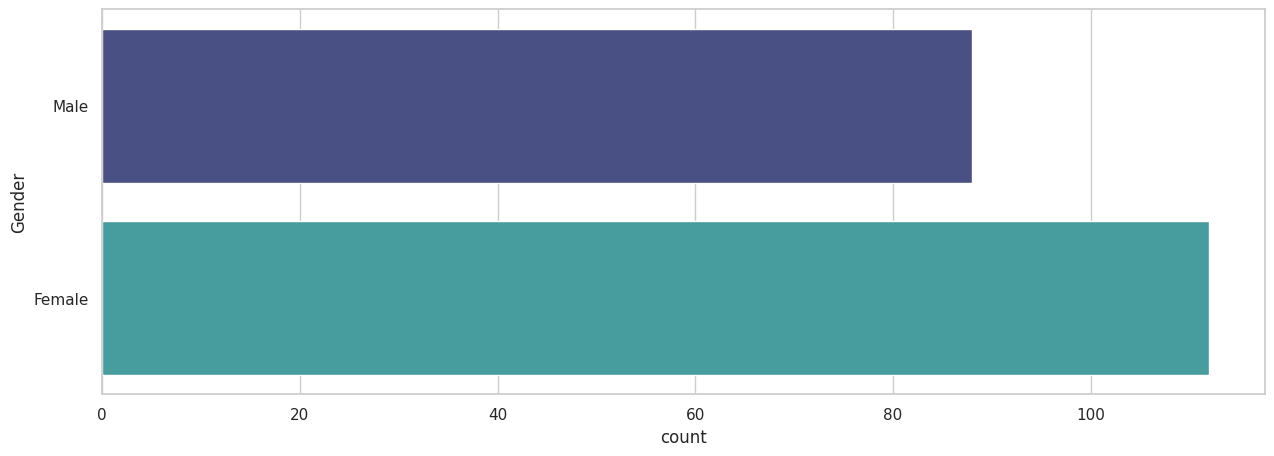

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(y="Gender",hue="Gender", data=df, palette='mako' )
plt.show()

## **Violin Plot**

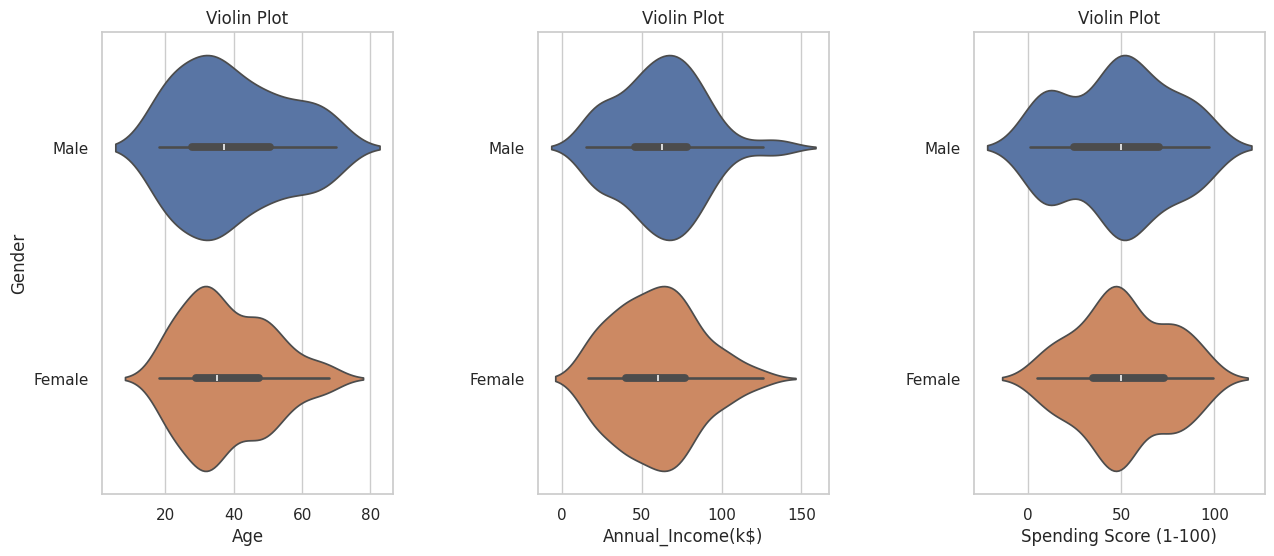

In [17]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age', 'Annual_Income(k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x= cols,y='Gender',hue='Gender'  , data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')

plt.show()

## **Customers || Age**

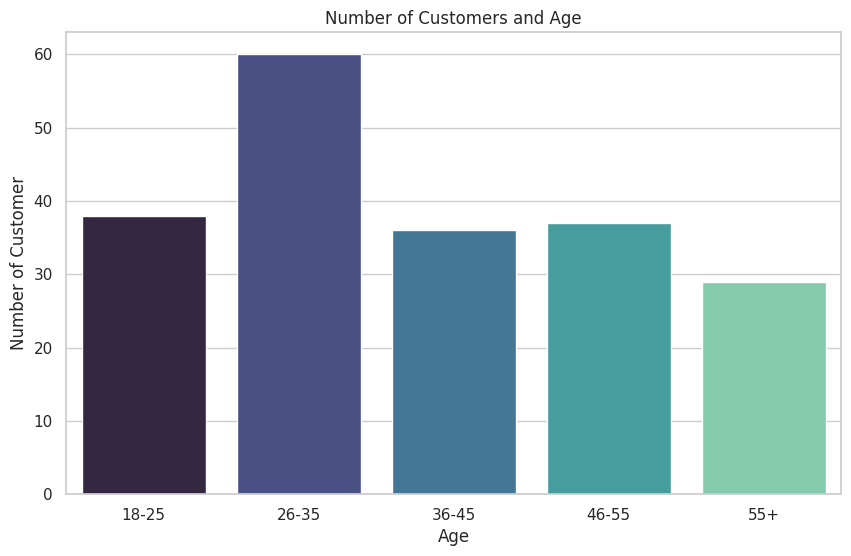

In [18]:
age_18_25= df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35= df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45= df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55= df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above= df.Age[df.Age >=56]

age_x=["18-25",'26-35', '36-45', '46-55', '55+']
age_y=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=age_x, y=age_y, hue=age_x, palette='mako')

plt.title('Number of Customers and Age')
plt.ylabel('Number of Customer')
plt.xlabel('Age')

plt.show()



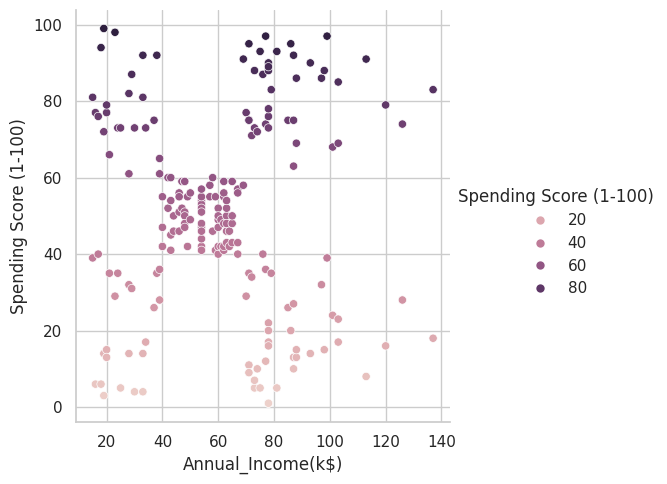

In [51]:
sns.relplot(x="Annual_Income(k$)", y="Spending Score (1-100)",hue="Spending Score (1-100)", data=df)

## **Customers || Spending Score**

<ipython-input-52-283bf6033325>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="rocket")


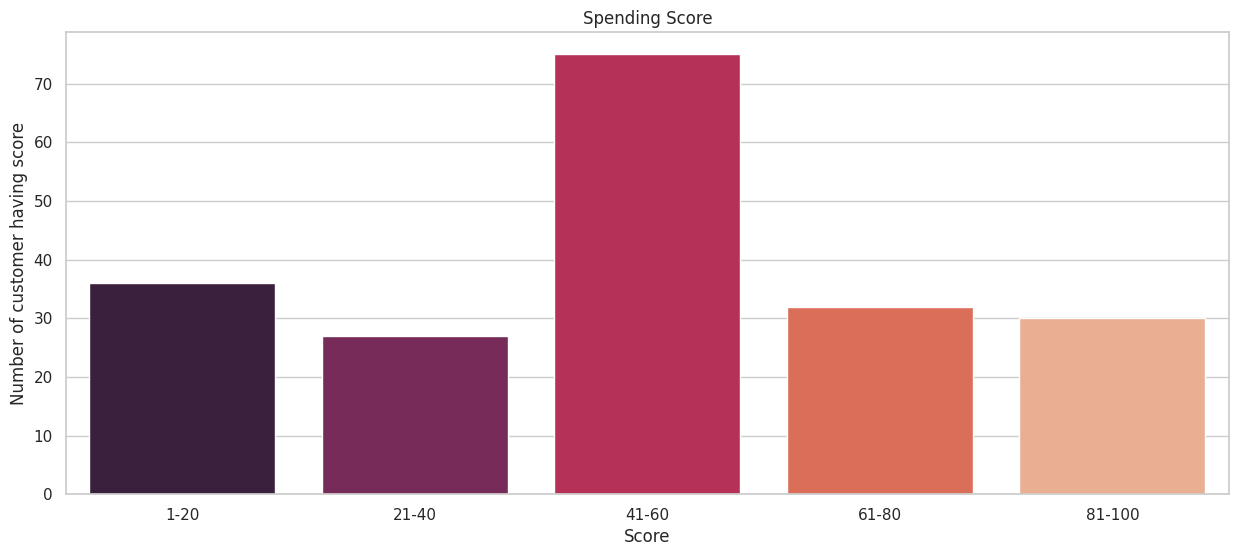

In [52]:
ss_1_20 = df["Spending Score (1-100)"][(df[("Spending Score (1-100)")]>=1) & (df[("Spending Score (1-100)")]<=20)]
ss_21_40 = df["Spending Score (1-100)"][(df[("Spending Score (1-100)")]>=21) & (df[("Spending Score (1-100)")]<=40)]
ss_41_60 = df["Spending Score (1-100)"][(df[("Spending Score (1-100)")]>=41) & (df[("Spending Score (1-100)")]<=60)]
ss_61_80 = df["Spending Score (1-100)"][(df[("Spending Score (1-100)")]>=61) & (df[("Spending Score (1-100)")]<=80)]
ss_81_100 = df["Spending Score (1-100)"][(df[("Spending Score (1-100)")]>=81) & (df[("Spending Score (1-100)")]<=100)]

ssx = ["1-20","21-40","41-60","61-80","81-100"]
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Number of customer having score")
plt.show()

## **Customers || Annual Income**

<ipython-input-53-837ac650ba7a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="Spectral")


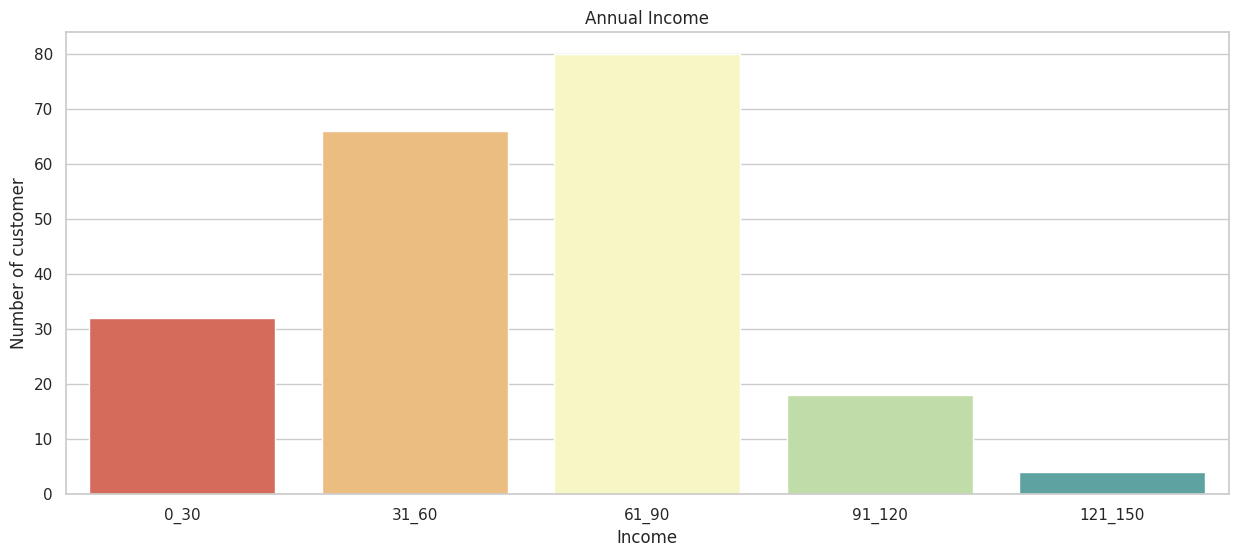

In [53]:
ai0_30 = df['Annual_Income(k$)'][(df[('Annual_Income(k$)')]>=0) & (df[('Annual_Income(k$)')]<=30)]
ai31_60 = df['Annual_Income(k$)'][(df[('Annual_Income(k$)')]>=31) & (df[('Annual_Income(k$)')]<=60)]
ai61_90 = df['Annual_Income(k$)'][(df[('Annual_Income(k$)')]>=61) & (df[('Annual_Income(k$)')]<=90)]
ai91_120 = df['Annual_Income(k$)'][(df[('Annual_Income(k$)')]>=91) & (df[('Annual_Income(k$)')]<=120)]
ai121_150 = df['Annual_Income(k$)'][(df[('Annual_Income(k$)')]>=121) & (df[('Annual_Income(k$)')]<=150)]

aix=["0_30","31_60","61_90","91_120","121_150"]
aiy=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of customer")
plt.show()



# **Application of K-Means clustering**

## **Checks Number of Clusters required**

### **Parameters: Age/Spending Score**

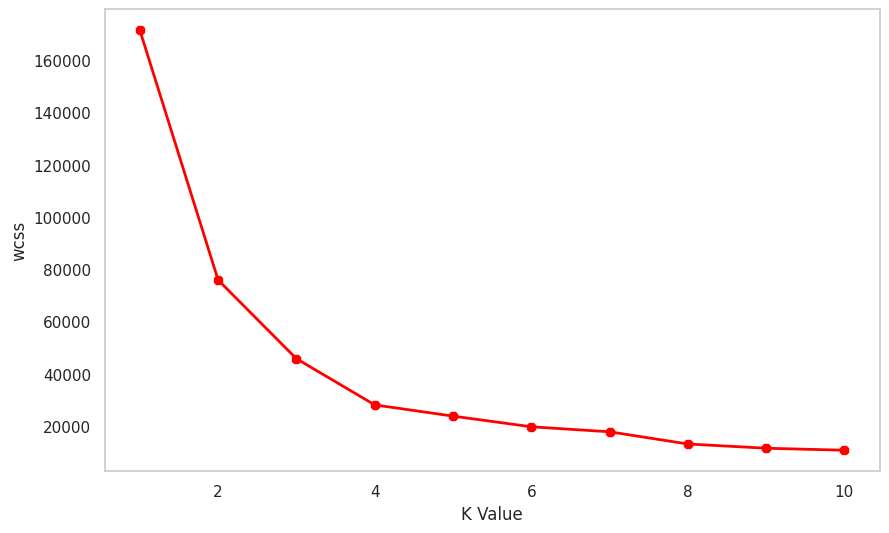

In [63]:
X1=df.loc[:,["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [57]:
kmeans= KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 1 1 3 2 1 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3
 2 3 2 0 2 0 1 3 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 2 1 2 0 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 0 2
 3 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


### **Centroids Proximity**

In [59]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]]


### **Visualization: Age/Credit Score**

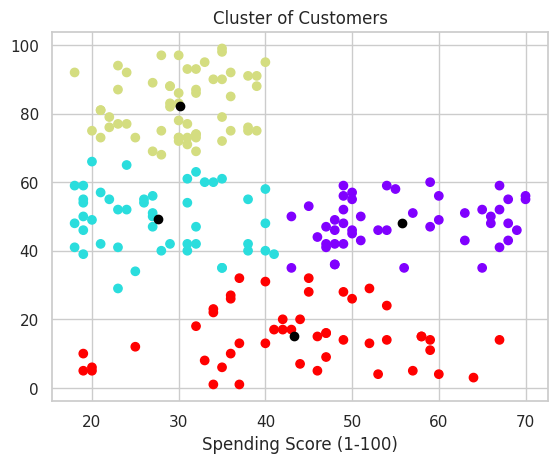

In [62]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Cluster of Customers")
plt.xlabel("Age")
plt.xlabel("Spending Score (1-100)")
plt.show()

## **Checks Number of Clusters required**

### **Parameters: Annual Income/Spending Score**

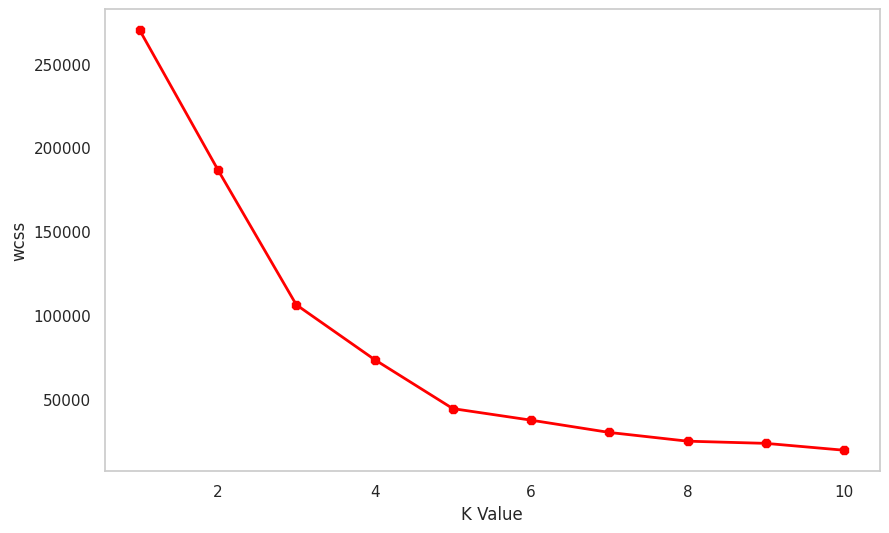

In [64]:
X2=df.loc[:,["Annual_Income(k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [66]:
kmeans= KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 2 3 4 3 4 3 2 3 4 3 4 3 4 3 4 3 2 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


### **Centroids Proximity**

In [67]:
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]


### **Visualization: Annual Income/Credit Score**

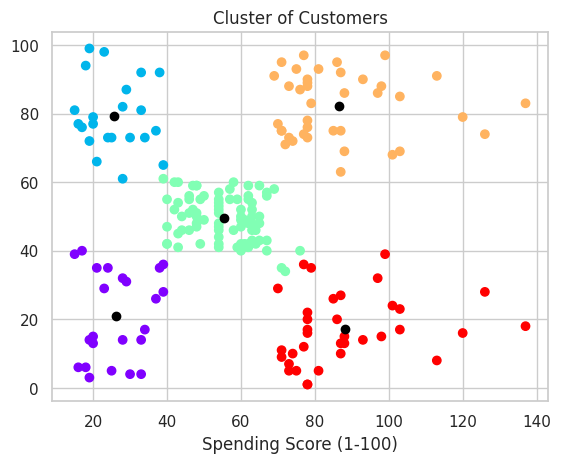

In [71]:
plt.scatter(X2[:,0], X1[:,1], c=kmeans.labels_,cmap= "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Cluster of Customers")
plt.xlabel("Annual_Income(k$)")
plt.xlabel("Spending Score (1-100)")
plt.show()

# **Final Number of Clusters required**

### **Parameters: Age/Annual Income/Credit Score**

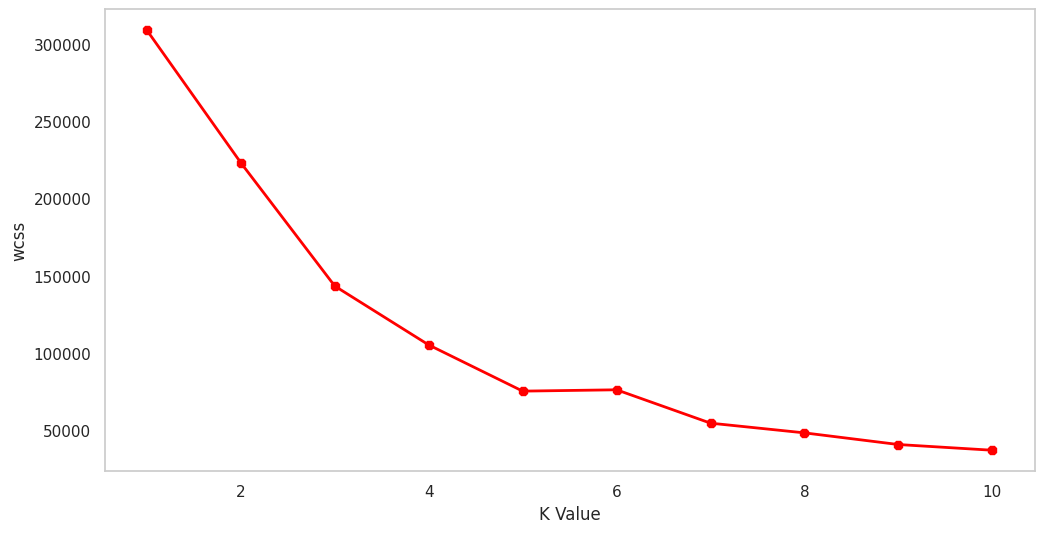

In [73]:
X3=df.iloc[:,1:]

wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [81]:
kmeans= KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 3 0 4 0 4 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 3 0 3 3 3 3 3 0 3 3 0 0 3 3 0 3 3 3 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 3 0 0 0 3 3 3 3 0 3 3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [82]:
print(kmeans.cluster_centers_)

[[24.8        41.46       63.7       ]
 [40.32432432 87.43243243 18.18918919]
 [32.69230769 86.53846154 82.12820513]
 [53.61538462 55.03846154 48.71153846]
 [44.31818182 25.77272727 20.27272727]]


## **Final Visualization**

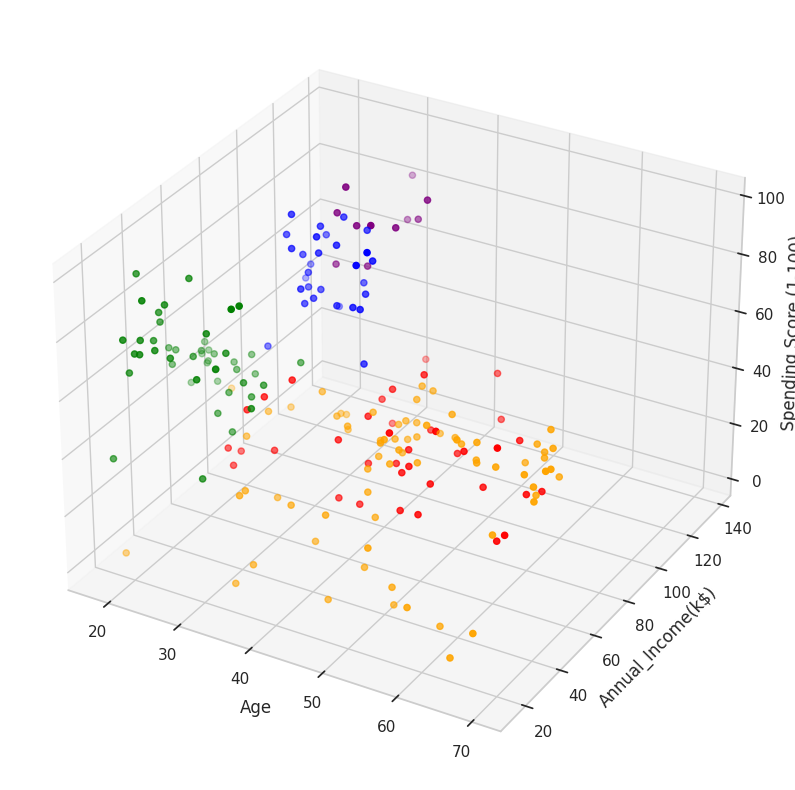

In [90]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax= fig.add_subplot(111, projection="3d")

ax.scatter(df.Age[df.label==0], df["Annual_Income(k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c="blue")
ax.scatter(df.Age[df.label==1], df["Annual_Income(k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c="red")
ax.scatter(df.Age[df.label==2], df["Annual_Income(k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c="green")
ax.scatter(df.Age[df.label==3], df["Annual_Income(k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c="orange")
ax.scatter(df.Age[df.label==4], df["Annual_Income(k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c="purple")

plt.xlabel("Age")
plt.ylabel("Annual_Income(k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()
